In [1]:
import pandas as pd

df = pd.read_excel('/workspaces/pyGAPS/docs/examples/data/色谱柱1和色谱柱2均值30度下pca分析.xlsx')
df.head()

,样本编号,苯_t0,苯_tR,苯_k,甲苯_t0,甲苯_tR,甲苯_k,乙苯_t0,乙苯_tR,乙苯_k,丙苯_t0,丙苯_tR,丙苯_k,丁苯_t0,丁苯_tR,丁苯_k,戊苯_t0,戊苯_tR,戊苯_k
0,M85-15,2.947,3.598,0.221,2.947,3.761,0.276,2.947,3.909,0.326,2.947,4.100,0.391,2.947,4.384,0.487,2.947,4.700,0.595
1,M80-20,2.917,3.868,0.326,2.917,4.149,0.423,2.917,4.424,0.517,2.917,4.810,0.649,2.917,5.369,0.841,2.917,6.026,1.066
2,M75-25,2.959,4.136,0.398,2.959,4.529,0.531,2.959,4.940,0.670,2.959,5.538,0.872,2.959,6.414,1.168,2.959,7.494,1.533
3,M70-30,2.982,4.452,0.493,2.982,5.000,0.680,2.982,5.639,0.891,2.982,6.569,1.204,2.982,7.990,1.680,2.982,9.833,2.299


In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   样本编号    4 non-null      object 
 1   苯_t0    4 non-null      float64
 2   苯_tR    4 non-null      float64
 3   苯_k     4 non-null      float64
 4   甲苯_t0   4 non-null      float64
 5   甲苯_tR   4 non-null      float64
 6   甲苯_k    4 non-null      float64
 7   乙苯_t0   4 non-null      float64
 8   乙苯_tR   4 non-null      float64
 9   乙苯_k    4 non-null      float64
 10  丙苯_t0   4 non-null      float64
 11  丙苯_tR   4 non-null      float64
 12  丙苯_k    4 non-null      float64
 13  丁苯_t0   4 non-null      float64
 14  丁苯_tR   4 non-null      float64
 15  丁苯_k    4 non-null      float64
 16  戊苯_t0   4 non-null      float64
 17  戊苯_tR   4 non-null      float64
 18  戊苯_k    4 non-null      float64
dtypes: float64(18), object(1)
memory usage: 740.0+ bytes


,样本编号,苯_t0,苯_tR,苯_k,甲苯_t0,甲苯_tR,甲苯_k,乙苯_t0,乙苯_tR,乙苯_k,丙苯_t0,丙苯_tR,丙苯_k,丁苯_t0,丁苯_tR,丁苯_k,戊苯_t0,戊苯_tR,戊苯_k
0,M85-15,2.947,3.598,0.221,2.947,3.761,0.276,2.947,3.909,0.326,2.947,4.100,0.391,2.947,4.384,0.487,2.947,4.700,0.595
1,M80-20,2.917,3.868,0.326,2.917,4.149,0.423,2.917,4.424,0.517,2.917,4.810,0.649,2.917,5.369,0.841,2.917,6.026,1.066
2,M75-25,2.959,4.136,0.398,2.959,4.529,0.531,2.959,4.940,0.670,2.959,5.538,0.872,2.959,6.414,1.168,2.959,7.494,1.533
3,M70-30,2.982,4.452,0.493,2.982,5.000,0.680,2.982,5.639,0.891,2.982,6.569,1.204,2.982,7.990,1.680,2.982,9.833,2.299


In [5]:
from sklearn.preprocessing import StandardScaler

# 1）取出特征（去掉“样品编号”）
X = df.drop(columns=["样本编号"])

# 2）标准化（PCA 必须）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# 转成 DataFrame 并附带样品编号
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["样本编号"] = df["样本编号"].values

pca_df

,PC1,PC2,样本编号
0,-4.032327,1.998207,M85-15
1,-3.216148,-2.220676,M80-20
2,1.373206,0.086996,M75-25
3,5.875269,0.135473,M70-30


/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDE

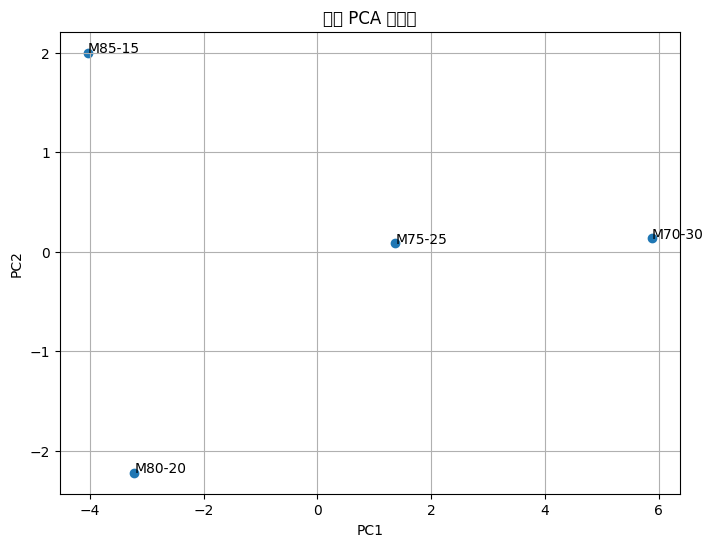

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"])

for i in range(len(pca_df)):
    plt.text(pca_df["PC1"][i], pca_df["PC2"][i], pca_df["样本编号"][i])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("样品 PCA 分布图")
plt.grid(True)
plt.show()

In [8]:
print("各主成分的方差贡献率：", pca.explained_variance_ratio_)
print("累计贡献率：", pca.explained_variance_ratio_.sum())

各主成分的方差贡献率： [0.87510755 0.12430771]
累计贡献率： 0.9994152634601711


In [9]:
loading = pd.DataFrame(pca.components_.T,
                       index=X.columns,
                       columns=["PC1", "PC2"])
loading

,PC1,PC2
苯_t0,0.215768,0.345209
苯_tR,0.244981,-0.154220
苯_k,0.239786,-0.203142
甲苯_t0,0.215768,0.345209
甲苯_tR,0.245204,-0.152727
甲苯_k,0.241632,-0.188562
乙苯_t0,0.215768,0.345209
乙苯_tR,0.246120,-0.143098
乙苯_k,0.243531,-0.171398
丙苯_t0,0.215768,0.345209
